In [10]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [11]:
# Variables

_url = 'https://api.projectoxford.ai/emotion/v1.0/recognize'
_key = '183aea69820e4dfda0176db816fc1f72'
_maxNumRetries = 5

In [12]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [13]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,255,255), thickness = 2 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0] + str(round(((max(currFace['scores'].items(), key=operator.itemgetter(1))[1]) * 100), 2))



        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,0), 1 )

In [5]:
result

NameError: name 'result' is not defined

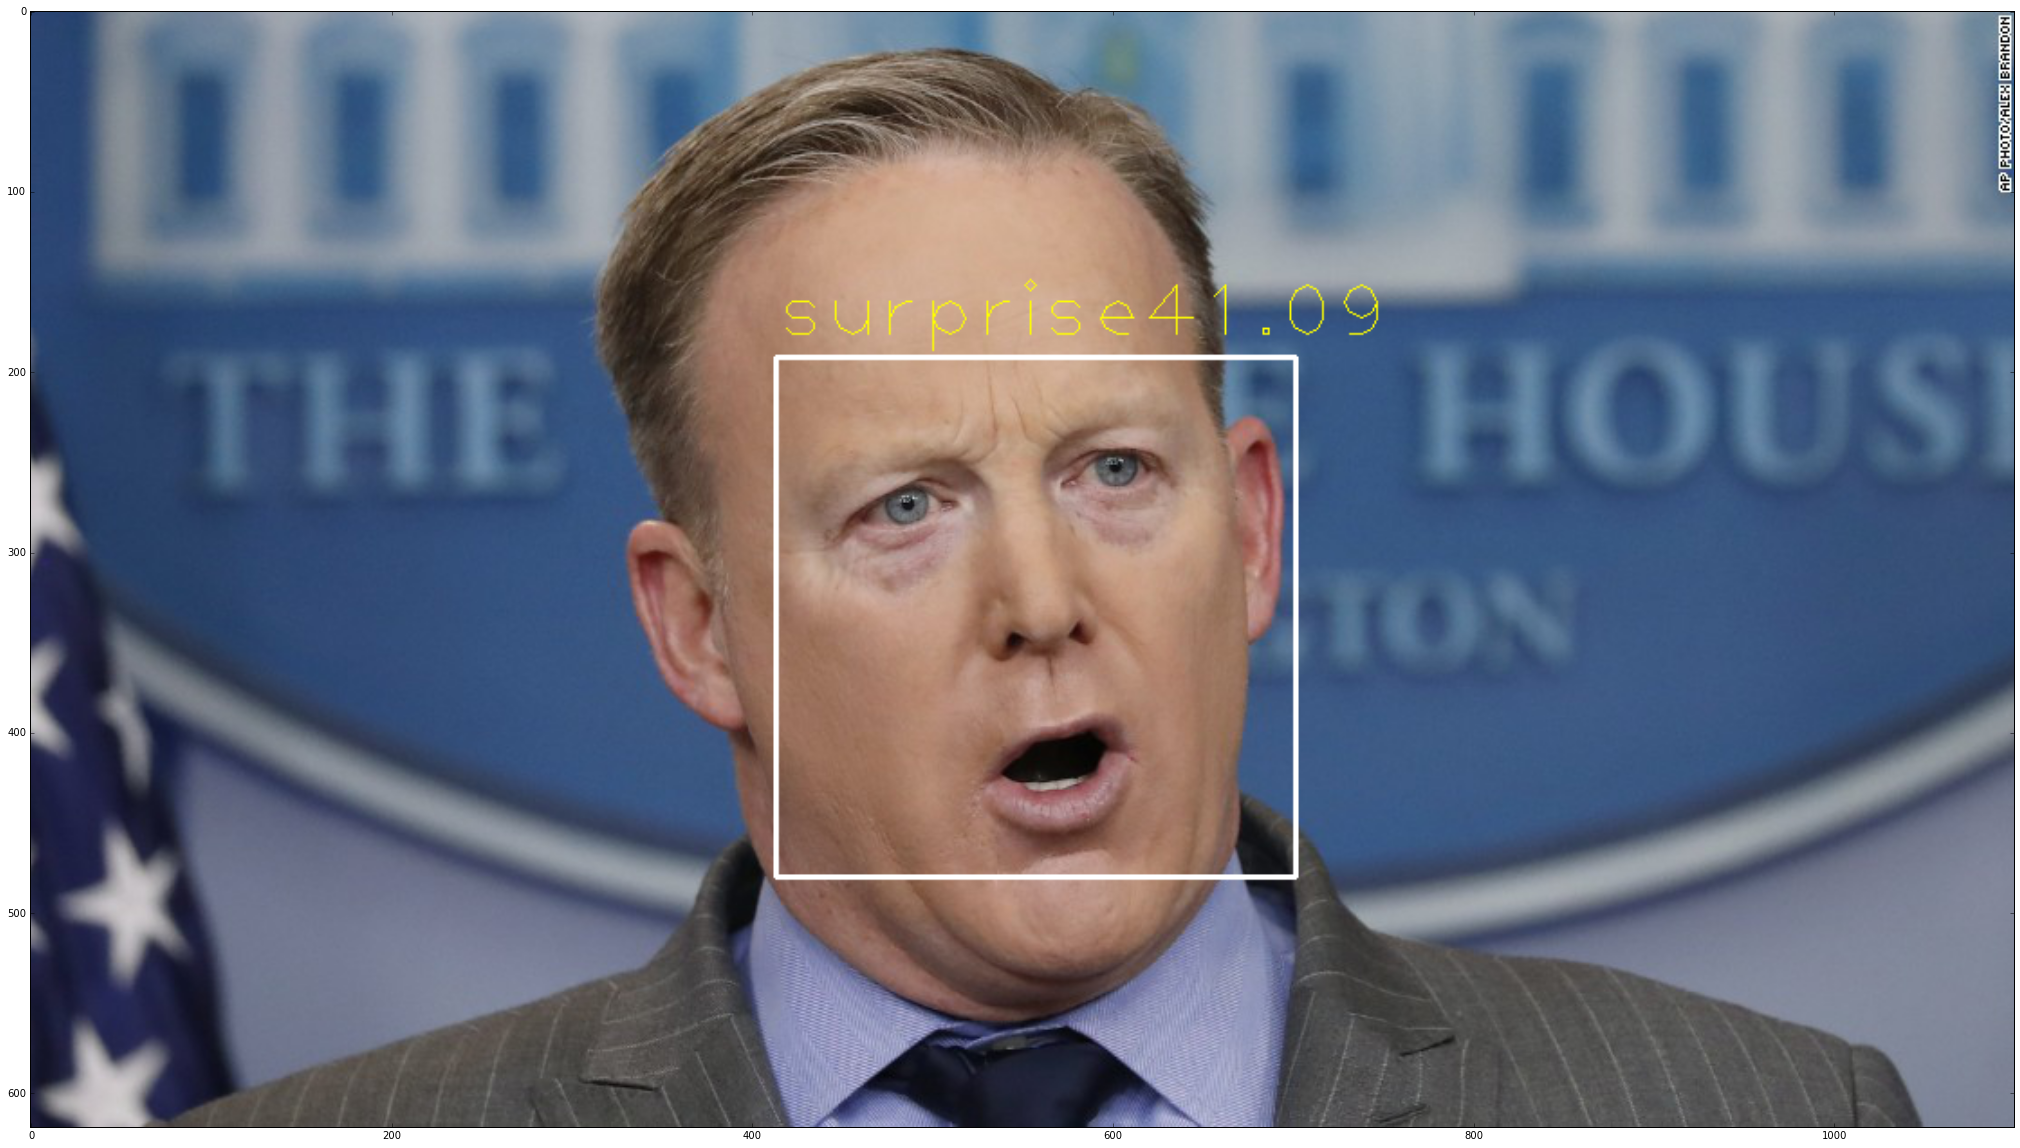

In [17]:
# URL direction to image
urlImage = 'http://i2.cdn.turner.com/money/dam/assets/170121175334-sean-spicer-press-secretary-statement-1100x619.jpg'
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None
params = None

result = processRequest( json, data, headers, params )

# del result[0]['scores']['neutral']


if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(150, 20))
    ax.imshow( img )

In [16]:
result

[{'faceRectangle': {'height': 263, 'left': 541, 'top': 333, 'width': 263},
  'scores': {'anger': 0.239155367,
   'contempt': 0.00583218737,
   'disgust': 0.0255864318,
   'fear': 0.000654347648,
   'happiness': 2.77063336e-05,
   'neutral': 0.6610903,
   'sadness': 0.00449462235,
   'surprise': 0.063159056}}]

In [18]:
result

[{'faceRectangle': {'height': 288, 'left': 413, 'top': 192, 'width': 288},
  'scores': {'anger': 0.311964631,
   'contempt': 0.0008646272,
   'disgust': 0.0225499868,
   'fear': 0.000209796068,
   'happiness': 0.000259144115,
   'neutral': 0.252738357,
   'sadness': 0.0005561124,
   'surprise': 0.41085735}}]